In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data = pd.read_csv('/content/drive/MyDrive/DM_ProjectData/Heart_2020_Data.csv')

In [12]:
df_viz = pd.read_csv('/content/drive/MyDrive/DM_ProjectData/Heart_2020_Data.csv')

**DATA PREPROCESSING**

In [13]:
bin_attributes = ['Asthma', 'Smoking', 'Stroke', 'HeartDisease','AlcoholDrinking', 'DiffWalking', 'SkinCancer','PhysicalActivity', 'KidneyDisease']
to_numeric = {'Yes':1,'No':0}
for conversion in range(0, len(bin_attributes)):
  data[bin_attributes[conversion]] = data[bin_attributes[conversion]].replace(to_numeric)

In [14]:
sex = {'Male':'1','Female':'0'} #replacing the male and female values to 1 and 0 respectively.
data['Sex'] = data['Sex'].replace(sex) 
#replacing the age range by assigning the values for each range 
age_range= {'18-24':0,'25-29':1, '30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12} 

data['AgeCategory'] = data['AgeCategory'].replace(age_range)

#Replacing the health status of the patient by assigning values based on health conditions
general_health = {'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
data['GenHealth'] = data['GenHealth'].replace(general_health)

#replacing the diabetic patients values based on the diabetic condition 
diabetes = {'No':0, 'No, borderline diabetes':1, 'Yes (during pregnancy)':2, 'Yes':3}
data['Diabetic'] = data['Diabetic'].replace(diabetes)

<ipython-input-15-9f645cbf1812>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correaltion = data.corr()


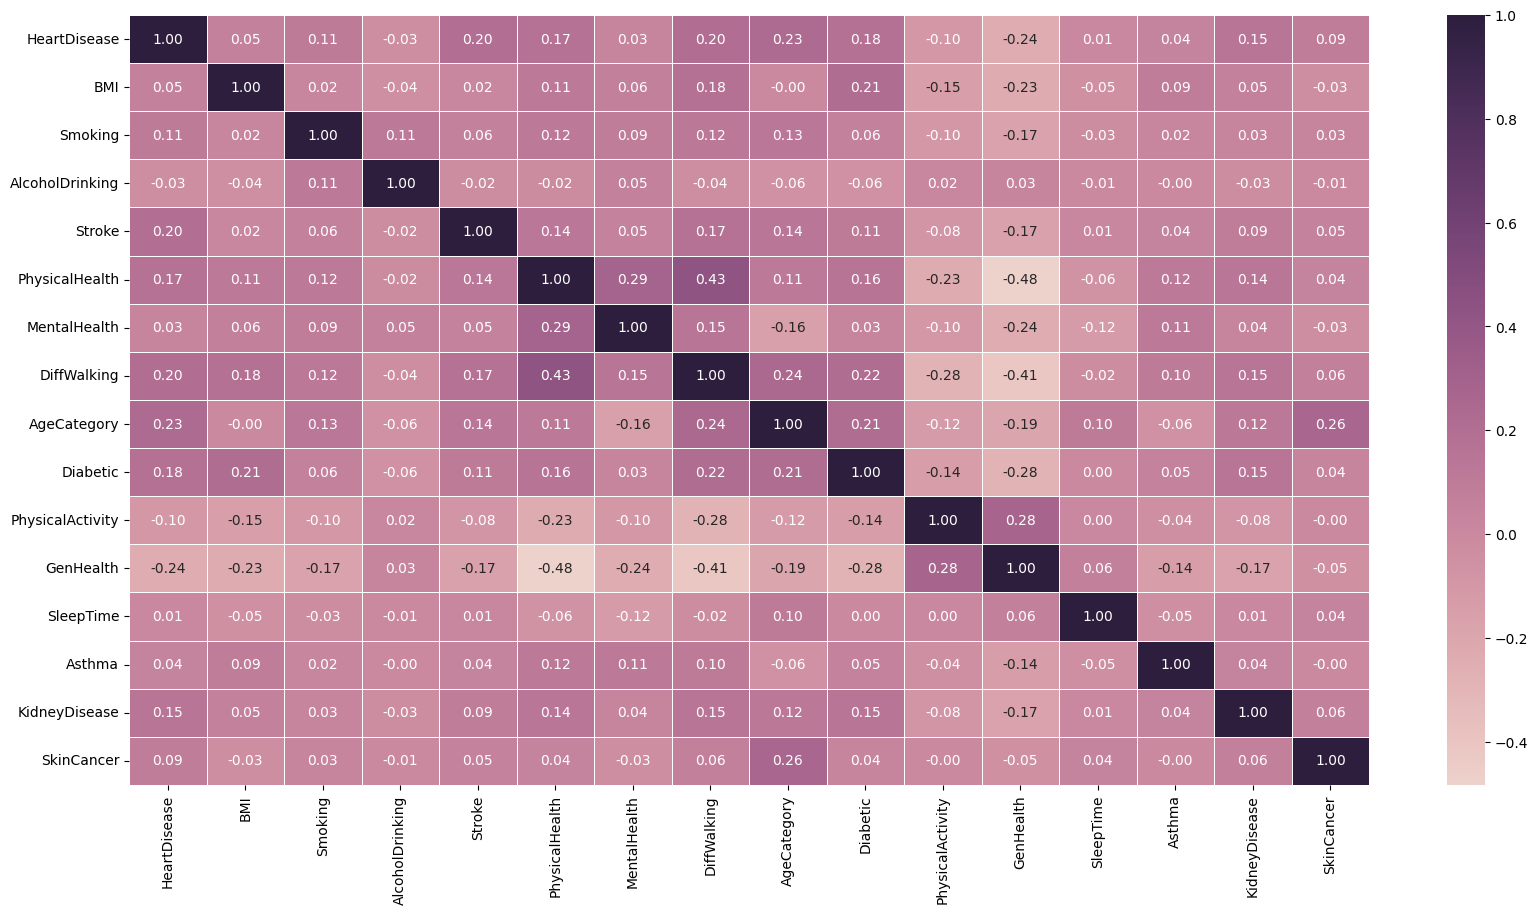

In [15]:
plt.figure(figsize=(20,10))
correaltion = data.corr()
plot =sns.heatmap(correaltion, annot=True,linewidth=.5, cmap=sns.cubehelix_palette(as_cmap=True),fmt='.2f')
plt.show()

In [16]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [17]:
viz1_object = df_viz.select_dtypes(exclude = object).columns
viz1_object

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'], dtype='object')

**DATA VISUALIZATION**

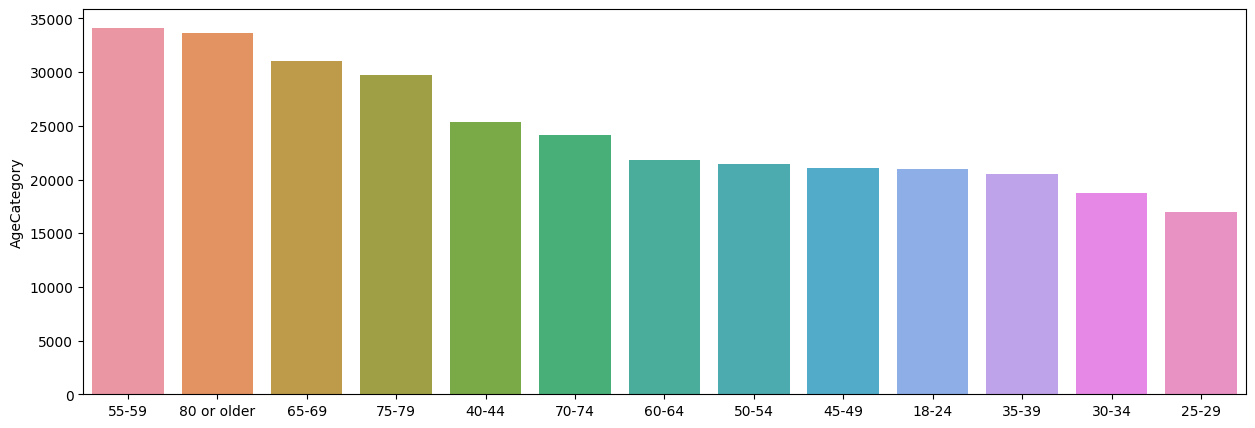

In [18]:
fig = plt.figure(figsize = (15, 5))
sns.barplot(y = df_viz['AgeCategory'].value_counts(), x = df_viz['AgeCategory'].unique(), orient = 'v')
plt.show()

From the Below Graph it can be depicted that General Health play an important role in our life, so our heart disease also depends on our General health in some or the other way.


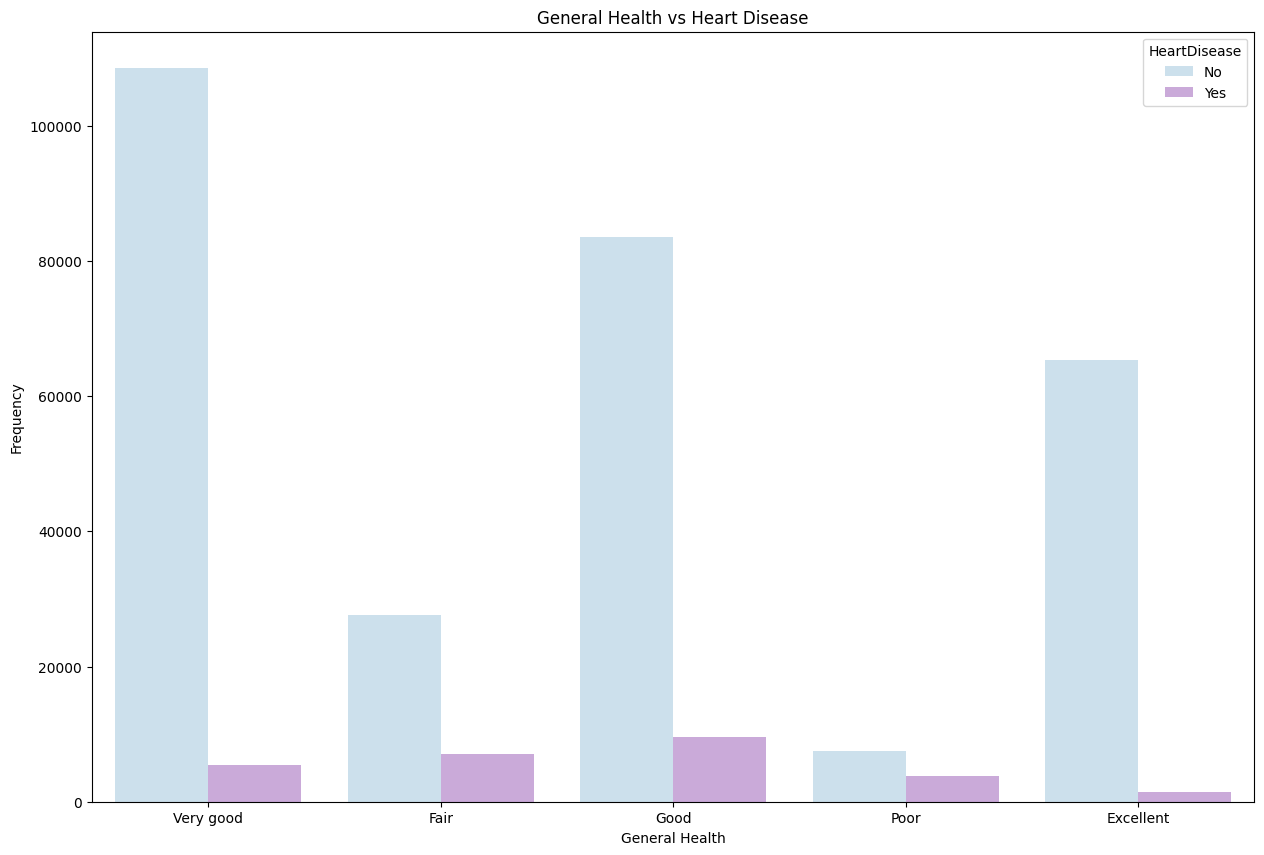

In [19]:
sns.set_palette('cubehelix_r')
plt.figure(figsize=(15,10))
sns.countplot(data=df_viz, x='GenHealth', hue='HeartDisease')
plt.title('General Health vs Heart Disease')
plt.xlabel('General Health')
plt.ylabel('Frequency')
plt.show()

From the below graph Sleeping for a longer period of time can also contribute to severe cardiac conditions, so sleep time should be regulated to 7 hours.


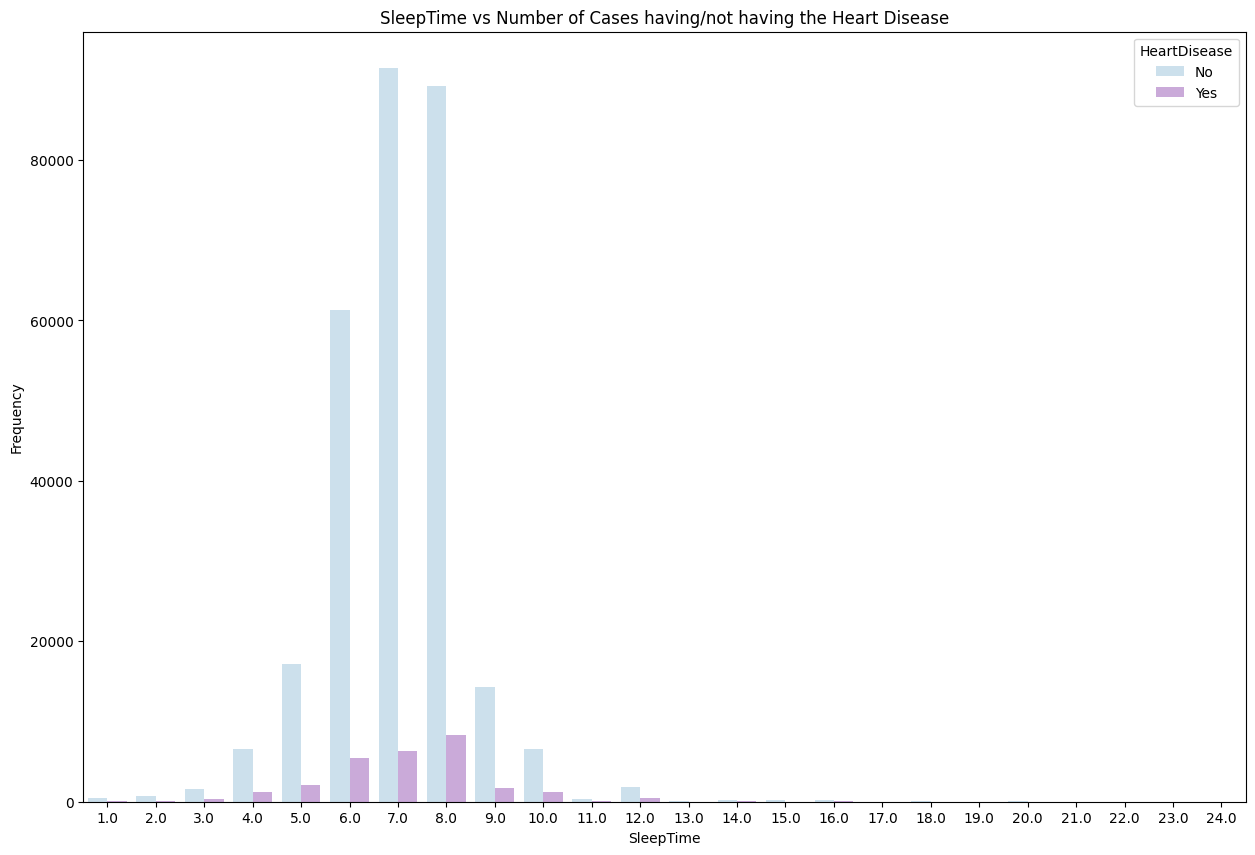

In [20]:
sns.set_palette('cubehelix_r')
plt.figure(figsize=(15,10))
sns.countplot(data=df_viz, x='SleepTime', hue='HeartDisease')
plt.title('SleepTime vs Number of Cases having/not having the Heart Disease')
plt.xlabel('SleepTime')
plt.ylabel('Frequency')
plt.show()

From the below graph it can be said that Asthma cannot be taken as the sole reason for the Heart Disease

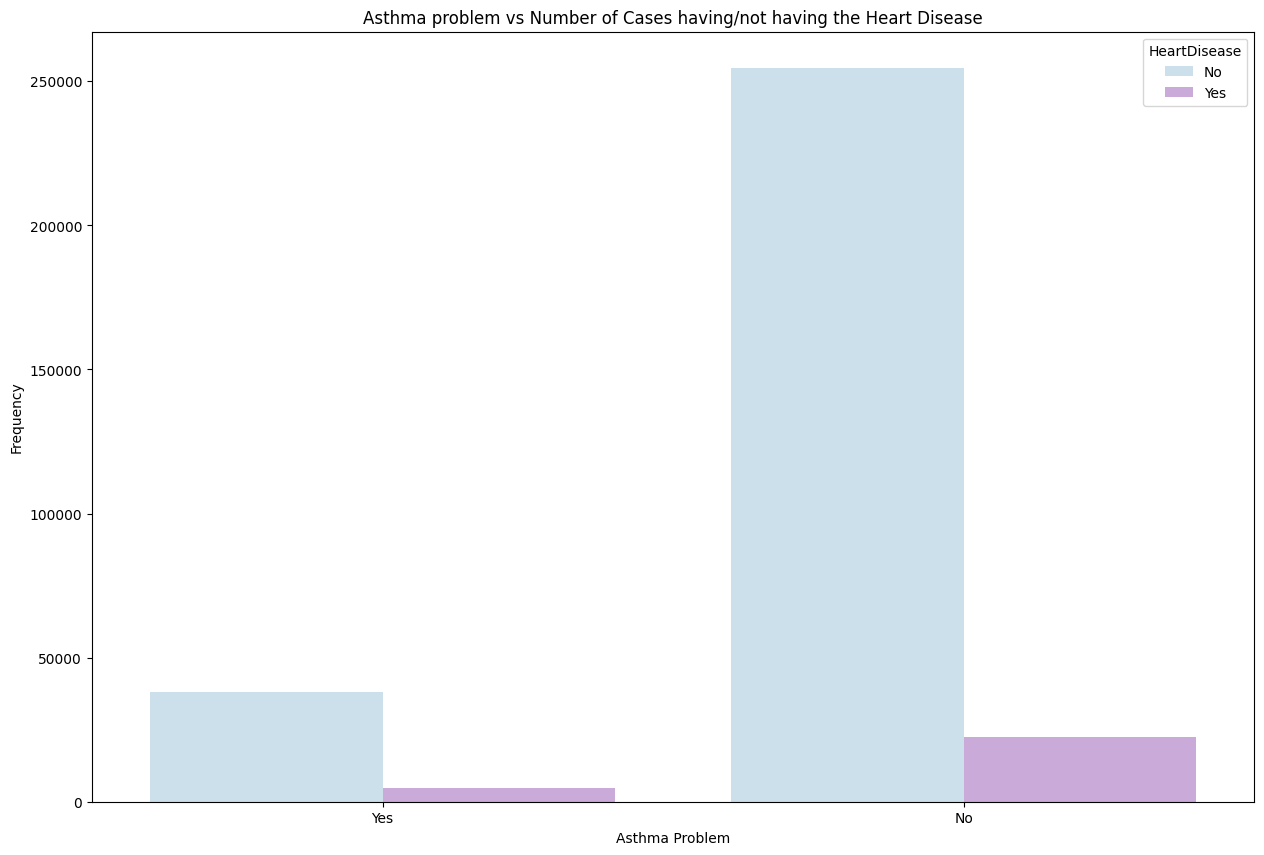

In [21]:
sns.set_palette('cubehelix_r')
plt.figure(figsize=(15,10))
sns.countplot(data=df_viz, x='Asthma', hue='HeartDisease')
plt.title('Asthma problem vs Number of Cases having/not having the Heart Disease')
plt.xlabel('Asthma Problem')
plt.ylabel('Frequency')
plt.show()

the below graph it can be said that same as the Asthma, Kidney problem cannot be taken as the sole reason for the Heart Disease

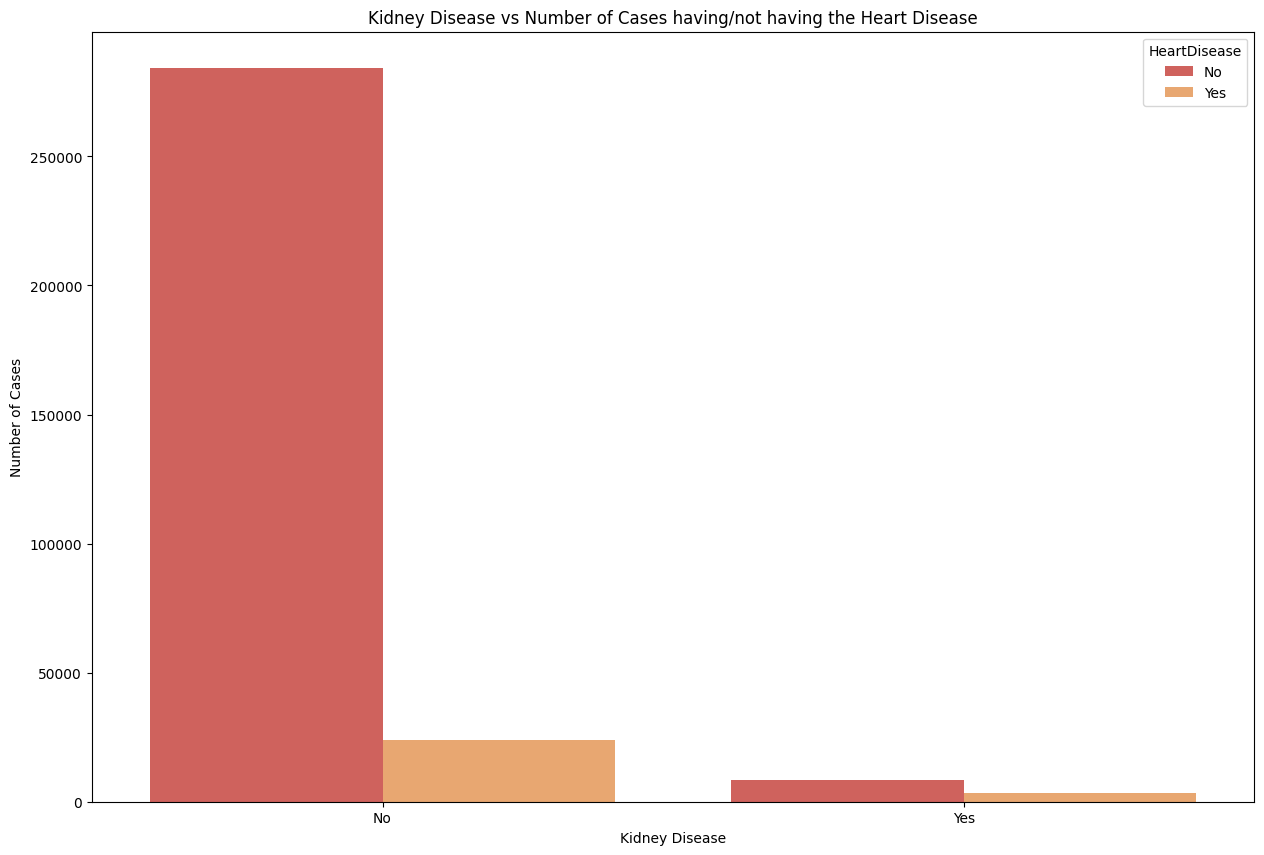

In [22]:
sns.set_palette('Spectral')
plt.figure(figsize=(15,10))
sns.countplot(data=df_viz, x='KidneyDisease', hue='HeartDisease')
plt.title('Kidney Disease vs Number of Cases having/not having the Heart Disease')
plt.xlabel('Kidney Disease')
plt.ylabel('Number of Cases')
plt.show()

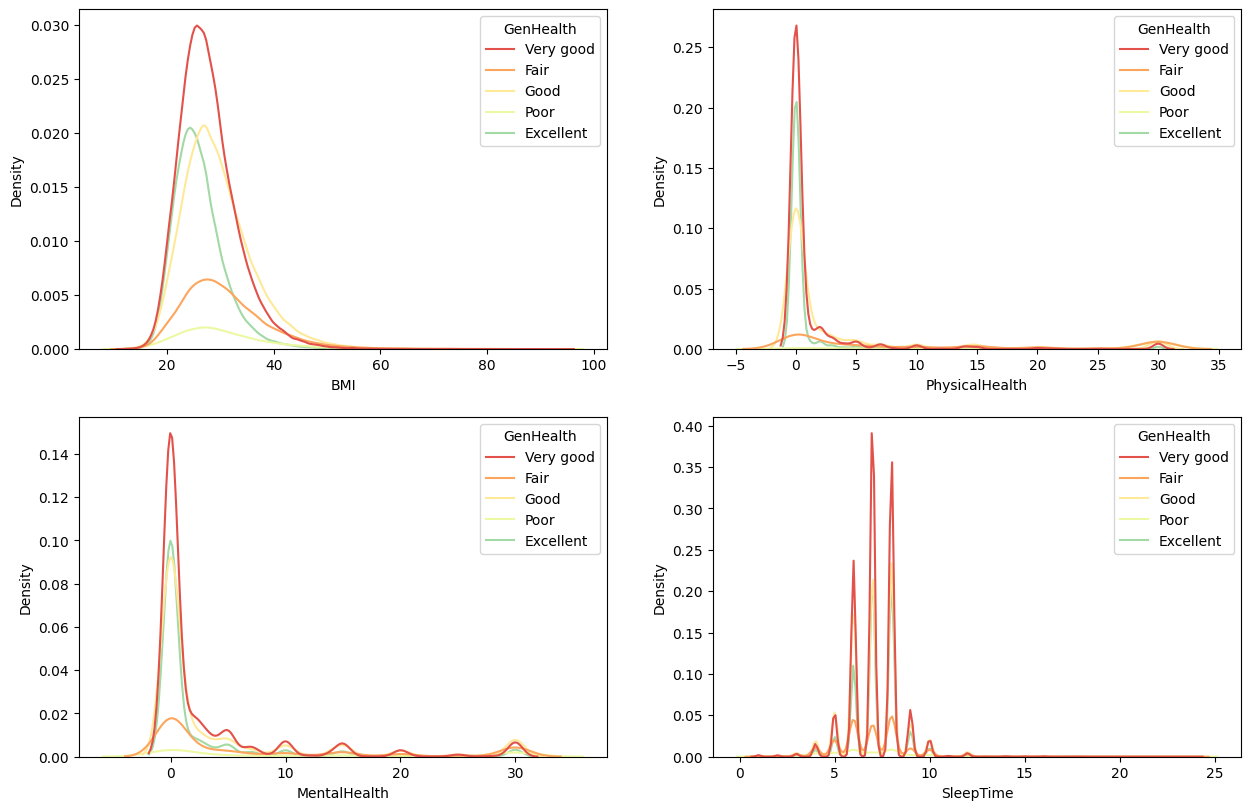

In [23]:
j=1
plt.figure(figsize=(15,15))
for col in viz1_object:
    plt.subplot(3,2,j)
    sns.kdeplot(x = df_viz[col], hue = df_viz['GenHealth'])
    j+=1

In [24]:
df_viz1 = pd.read_csv('/content/drive/MyDrive/DM_ProjectData/Heart_2020_Data.csv')

In [25]:
# Create the function to visualize to pie chart
def draw_pie_chart(list_name_feature):
    indice = 0
    for name_feature in list_name_feature:
        fig,axes = plt.subplots(figsize=(8,8))
        textprops = {"fontsize":15}
        axes.pie(df_viz1[name_feature].value_counts(),autopct='%1.2f%%',
                    textprops=textprops)
        axes.set_title(name_feature,fontsize=15)
        axes.legend(df_viz1[name_feature].value_counts().index,fontsize=12,bbox_to_anchor=(0.9,0,0.01,1))
        
        indice += 1
        
    plt.show() 
    
    return


In [26]:
cat_attributes = df_viz1.select_dtypes(exclude=['int64', 'float64'])

The below figures indicate the pie charts show the distribution of unique values in each categorical variable.

The output of the code is a grid of pie charts, one for each categorical variable. Each pie chart shows the percentage of occurrences of each unique value in the categorical variable. The title of each chart is the name of the categorical variable. The output provides a visual representation of the distribution of categorical variables in the dataset, allowing for a quick and easy understanding of the data.

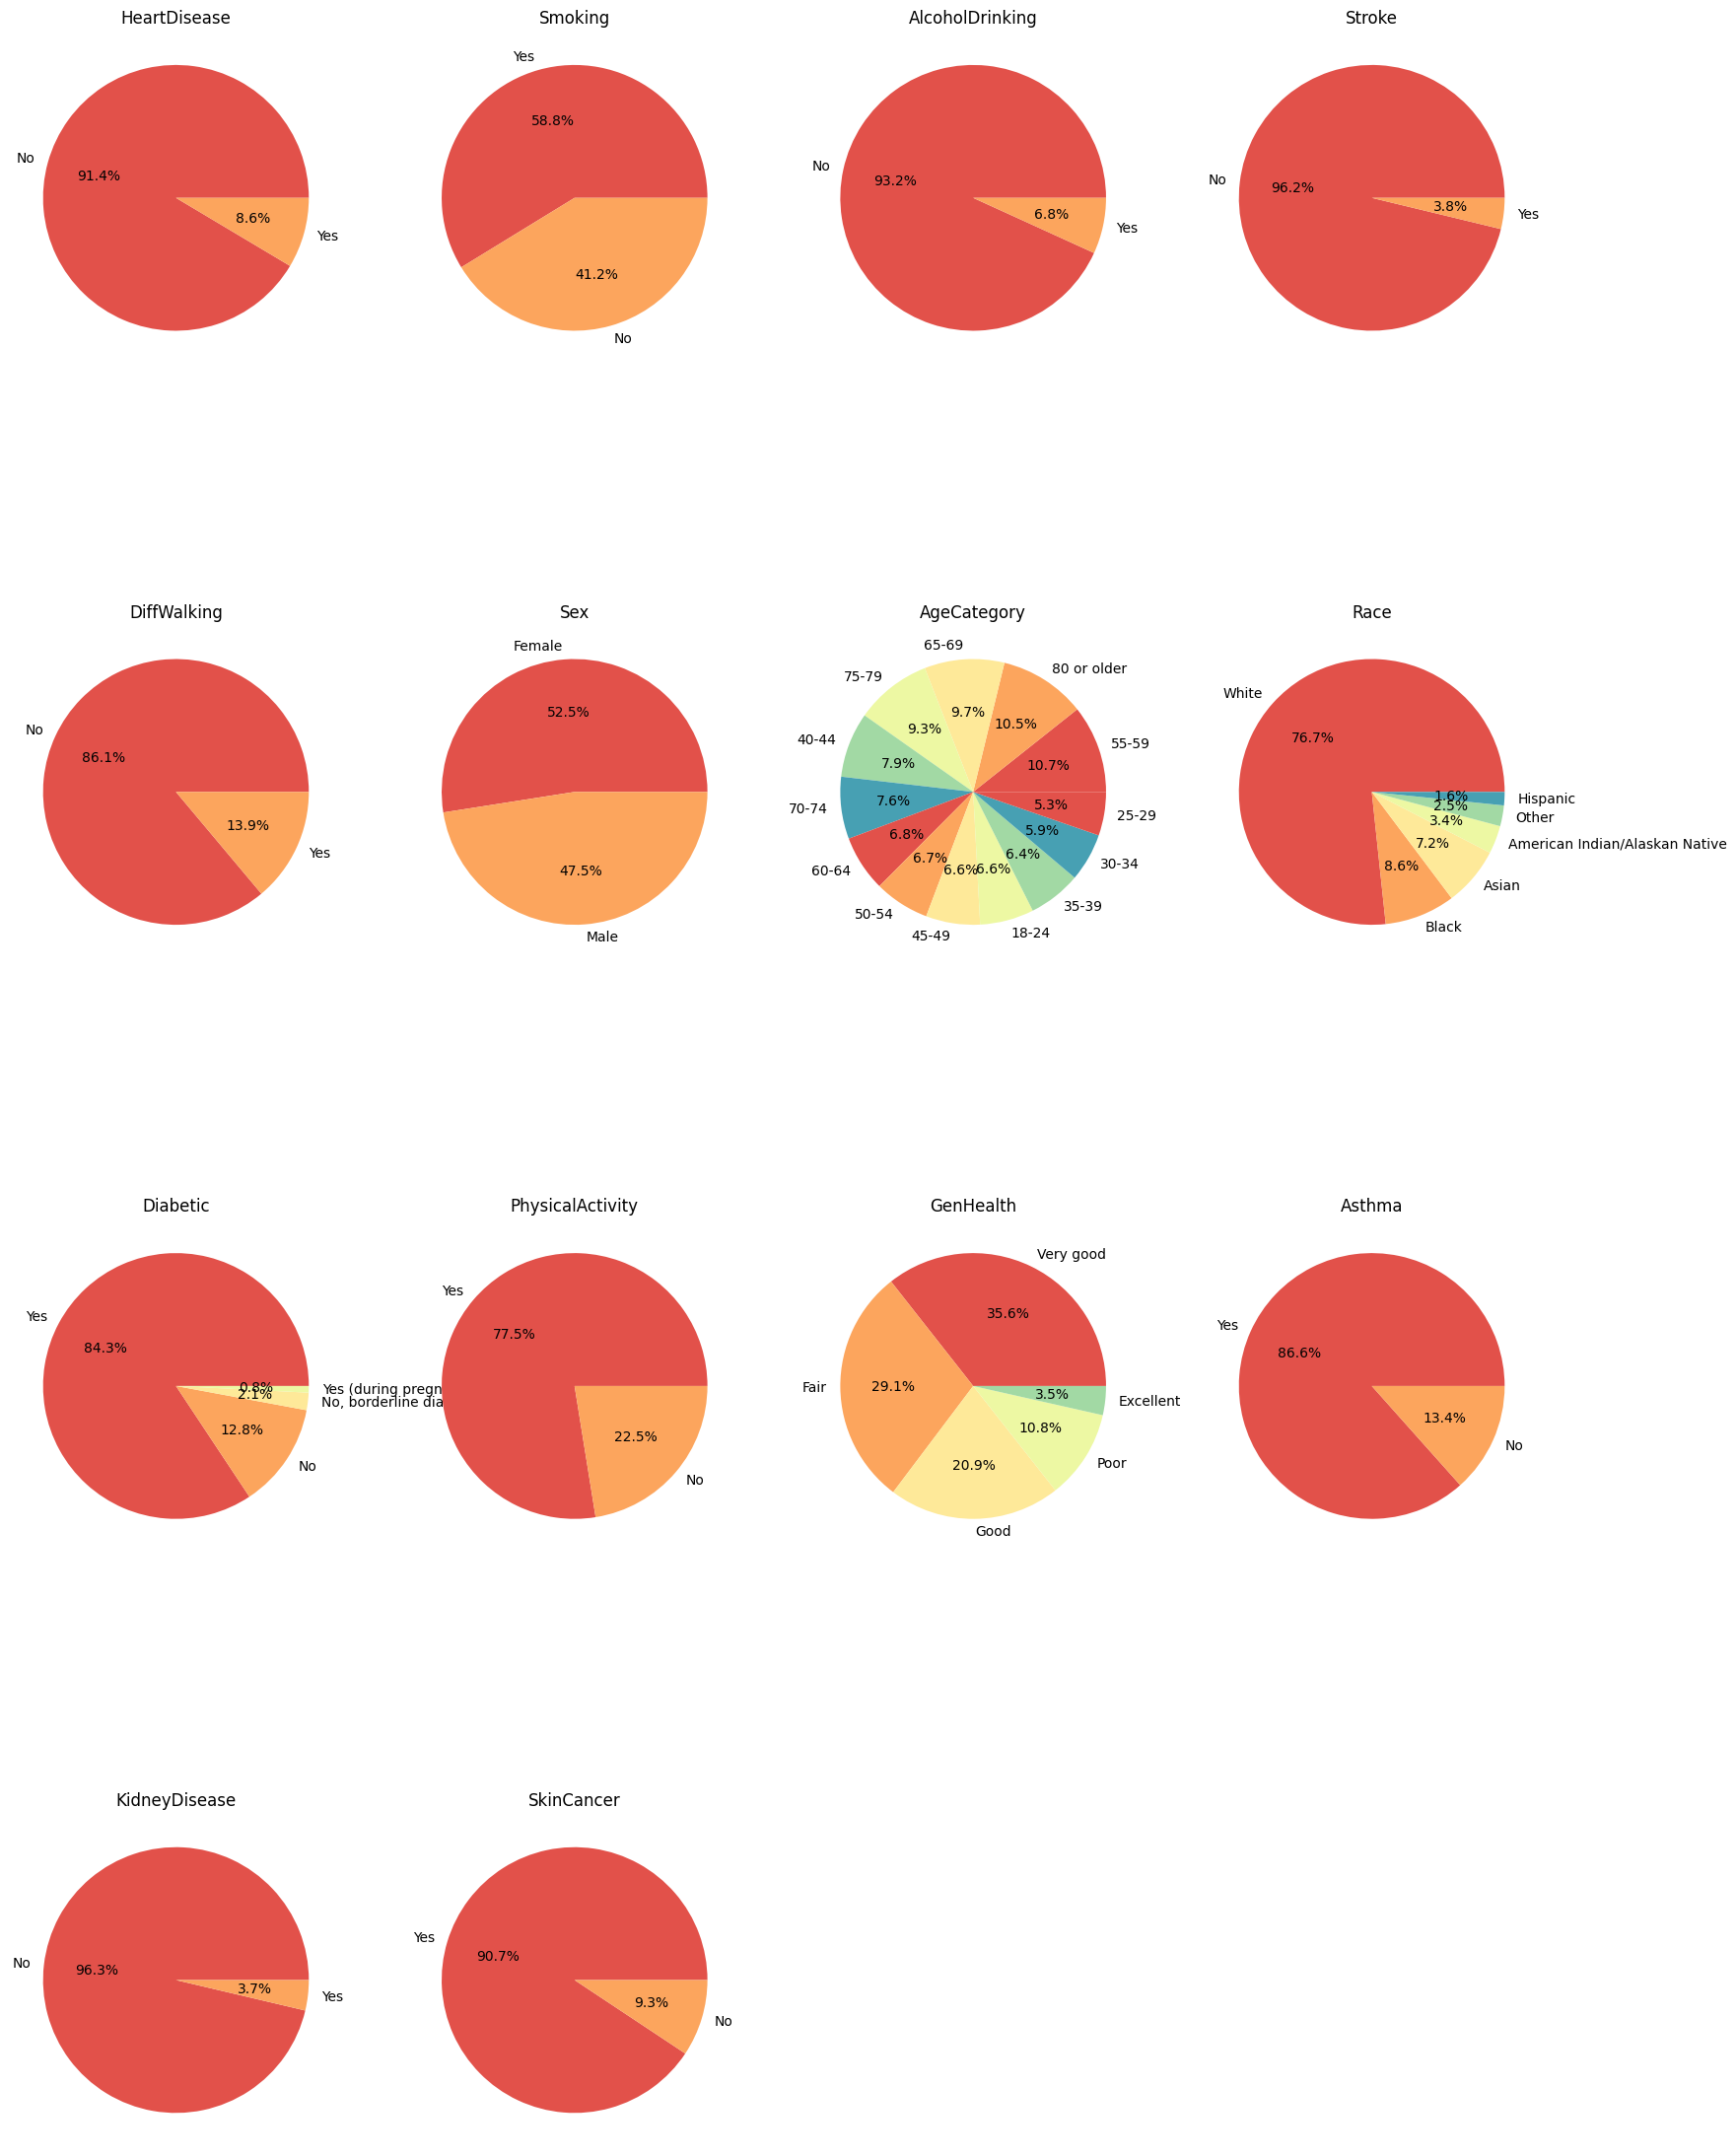

In [27]:
import matplotlib.pyplot as plt

# set figure size and create subplots
fig = plt.figure(figsize=(20, 30))
num_of_charts = len(cat_attributes.columns)
num_of_rows = (num_of_charts // 4) + 1
gs = fig.add_gridspec(num_of_rows, 4)

# loop through attributes and create pie charts
for i, col in enumerate(cat_attributes.columns):
    row_num = i // 4
    col_num = i % 4
    ax = fig.add_subplot(gs[row_num, col_num])
    ax.pie(cat_attributes[col].value_counts(), labels=cat_attributes[col].unique(), autopct='%1.1f%%')
    ax.set_title(col)

plt.show()


The below graphs show the distribution of each numerical variable in the dataset, and the different colors represent the different levels of “GenHealth". Overall, this code provides an effective way to visually explore the relationships between numerical variables and a categorical variable in a dataset

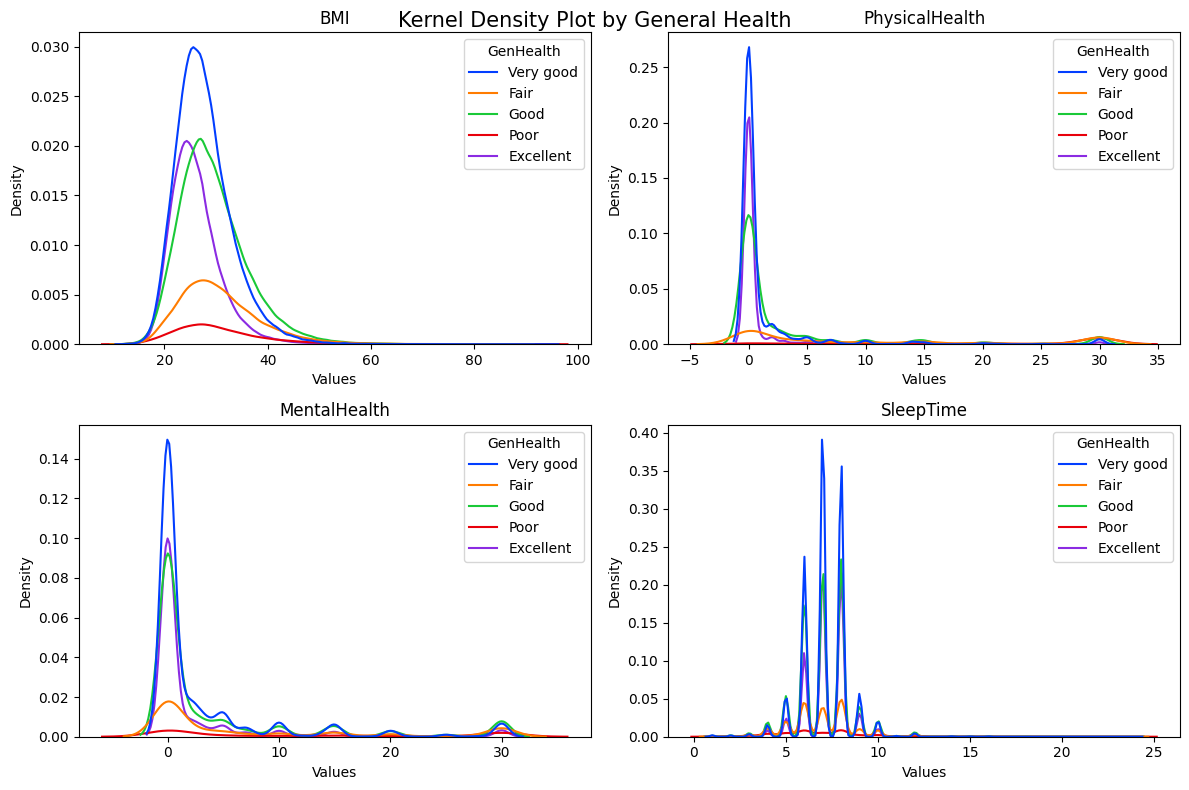

In [28]:
# Select columns with numerical data types
viz1_numeric = df_viz.select_dtypes(exclude='object').columns

# Set the number of subplots and figure size
num_subplots = len(viz1_numeric)
num_rows = num_subplots // 2 + num_subplots % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4*num_rows))

# Loop over each column and plot a KDE plot
for i, col in enumerate(viz1_numeric):
    row_idx = i // 2
    col_idx = i % 2
    ax = axes[row_idx, col_idx]
    sns.kdeplot(x=df_viz[col], hue=df_viz['GenHealth'], ax=ax, palette='bright')
    ax.set_title(col)
    ax.set_xlabel('Values')
    ax.set_ylabel('Density')

# Remove any unused subplots
for i in range(num_subplots, num_rows*2):
    fig.delaxes(axes[i // 2, i % 2])

# Adjust subplot spacing and add figure title
fig.tight_layout()
fig.suptitle('Kernel Density Plot by General Health', fontsize=15)

# Show the plot
plt.show()


In [29]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,White,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,White,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,White,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,White,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,White,0,1,3,8.0,0,0,0


In [30]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     30

In [31]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
for x in data.columns:
    if data[x].dtype=='object':
        data[x]=enc.fit_transform(data[x])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     30

In [32]:
data=data.drop(['SkinCancer'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  int64  
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  int64  
 3   AlcoholDrinking   301717 non-null  int64  
 4   Stroke            301717 non-null  int64  
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  int64  
 8   Sex               301717 non-null  int64  
 9   AgeCategory       301717 non-null  int64  
 10  Race              301717 non-null  int64  
 11  Diabetic          301717 non-null  int64  
 12  PhysicalActivity  301717 non-null  int64  
 13  GenHealth         301717 non-null  int64  
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  int64  
 16  KidneyDisease     30

In [33]:
for x in data.columns:
    data[x]=(data[x]-data[x].min())/(data[x].max()-data[x].min())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  float64
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  float64
 3   AlcoholDrinking   301717 non-null  float64
 4   Stroke            301717 non-null  float64
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  float64
 8   Sex               301717 non-null  float64
 9   AgeCategory       301717 non-null  float64
 10  Race              301717 non-null  float64
 11  Diabetic          301717 non-null  float64
 12  PhysicalActivity  301717 non-null  float64
 13  GenHealth         301717 non-null  float64
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  float64
 16  KidneyDisease     30

**DATA PARTIONING**

In [34]:
y=data['HeartDisease']
x=data.drop(['HeartDisease'],axis=1)

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test ,y_train, y_test = train_test_split(x,y,
                                                   test_size=0.30,
                                                   random_state=0,
                                                  shuffle = True,
                                                  stratify = y)

print('training data shape is :{}.'.format(X_train.shape))
print('training label shape is :{}.'.format(y_train.shape))
print('testing data shape is :{}.'.format(X_test.shape))
print('testing label shape is :{}.'.format(y_test.shape))


training data shape is :(211201, 16).
training label shape is :(211201,).
testing data shape is :(90516, 16).
testing label shape is :(90516,).


**DATA MODELS**

In [36]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(X_train,y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions= model1 .predict(X_test)
percentage= model1.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("confusion matrix")
print(res)
# check the accuracy on the training set
print(model1.score(X_train, y_train))
print(model1.score(X_test, y_test))
print(f"Test set:{len(X_test)}")
print(f"Accuracy={percentage*100}%")

confusion matrix
[[81614   724]
 [ 7309   869]]
0.9111415192162916
0.9112532590923151
Test set:90516
Accuracy=91.12532590923152%


In [38]:
from xgboost import XGBClassifier
model2=XGBClassifier()
model2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions= model2 .predict(X_test)
percentage= model2.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("confusion matrix")
print(res)
# check the accuracy on the training set
print(model2.score(X_train, y_train))
print(model2.score(X_test, y_test))
print(f"Test set:{len(X_test)}")
print(f"Accuracy={percentage*100}%")

confusion matrix
[[81637   701]
 [ 7402   776]]
0.917140543842122
0.9104799151531221
Test set:90516
Accuracy=91.0479915153122%


In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN model instance
model4 = KNeighborsClassifier() # n_neighbors is a hyperparameter that you can adjust

# Fit the model to the training data
model4.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions= model4 .predict(X_test)
percentage= model4.score(X_test,y_test)
res=confusion_matrix(y_test,predictions)
print("confusion matrix")
print(res)
# check the accuracy on the training set
print(model4.score(X_train, y_train))
print(model4.score(X_test, y_test))
print(f"Test set:{len(X_test)}")
print(f"Accuracy={percentage*100}%")

confusion matrix
[[80378  1960]
 [ 6962  1216]]
0.9214681748665963
0.9014317910645632
Test set:90516
Accuracy=90.14317910645632%


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model instance
model_rf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is a hyperparameter that you can adjust

# Fit the model to the training data
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions_rf = model_rf.predict(X_test)
percentage_rf = model_rf.score(X_test, y_test)
res_rf = confusion_matrix(y_test, predictions_rf)

# Print confusion matrix
print("Confusion matrix")
print(res_rf)

# Print accuracy on the training and test sets
print(f"Training accuracy: {model_rf.score(X_train, y_train)}")
print(f"Test accuracy: {model_rf.score(X_test, y_test)}")

# Print number of samples in the test set and the accuracy percentage
print(f"Test set size: {len(X_test)}")
print(f"Accuracy: {percentage_rf*100}%")


Confusion matrix
[[80312  2026]
 [ 7169  1009]]
Training accuracy: 0.9964015321897151
Test accuracy: 0.8984157497017102
Test set size: 90516
Accuracy: 89.84157497017102%


In [44]:
from sklearn.naive_bayes import GaussianNB

# Create a Naive Bayes model instance
model_nb = GaussianNB()

# Fit the model to the training data
model_nb.fit(X_train, y_train)


GaussianNB()

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix
predictions_nb = model_nb.predict(X_test)
percentage_nb = model_nb.score(X_test, y_test)
res_nb = confusion_matrix(y_test, predictions_nb)

# Print confusion matrix
print("Confusion matrix")
print(res_nb)

# Print accuracy on the training and test sets
print(f"Training accuracy: {model_nb.score(X_train, y_train)}")
print(f"Test accuracy: {model_nb.score(X_test, y_test)}")

# Print number of samples in the test set and the accuracy percentage
print(f"Test set size: {len(X_test)}")
print(f"Accuracy: {percentage_nb*100}%")


Confusion matrix
[[72525  9813]
 [ 4451  3727]]
Training accuracy: 0.8407062466560291
Test accuracy: 0.842414600733572
Test set size: 90516
Accuracy: 84.2414600733572%


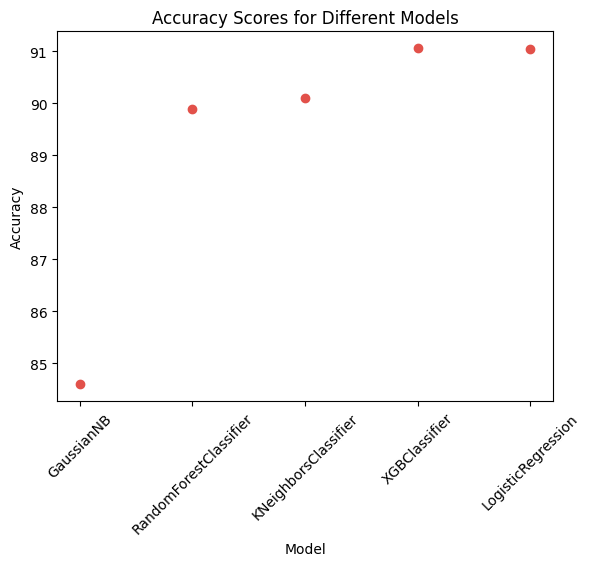

In [46]:
import matplotlib.pyplot as plt

# Sample data
accuracy_scores = [84.6, 89.9, 90.1, 91.06,91.04]
model_names = ['GaussianNB', 'RandomForestClassifier', 'KNeighborsClassifier', 'XGBClassifier','LogisticRegression']

# Create scatter plot
plt.scatter(model_names, accuracy_scores)

# Set plot title and labels
plt.title('Accuracy Scores for Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display plot
plt.show()

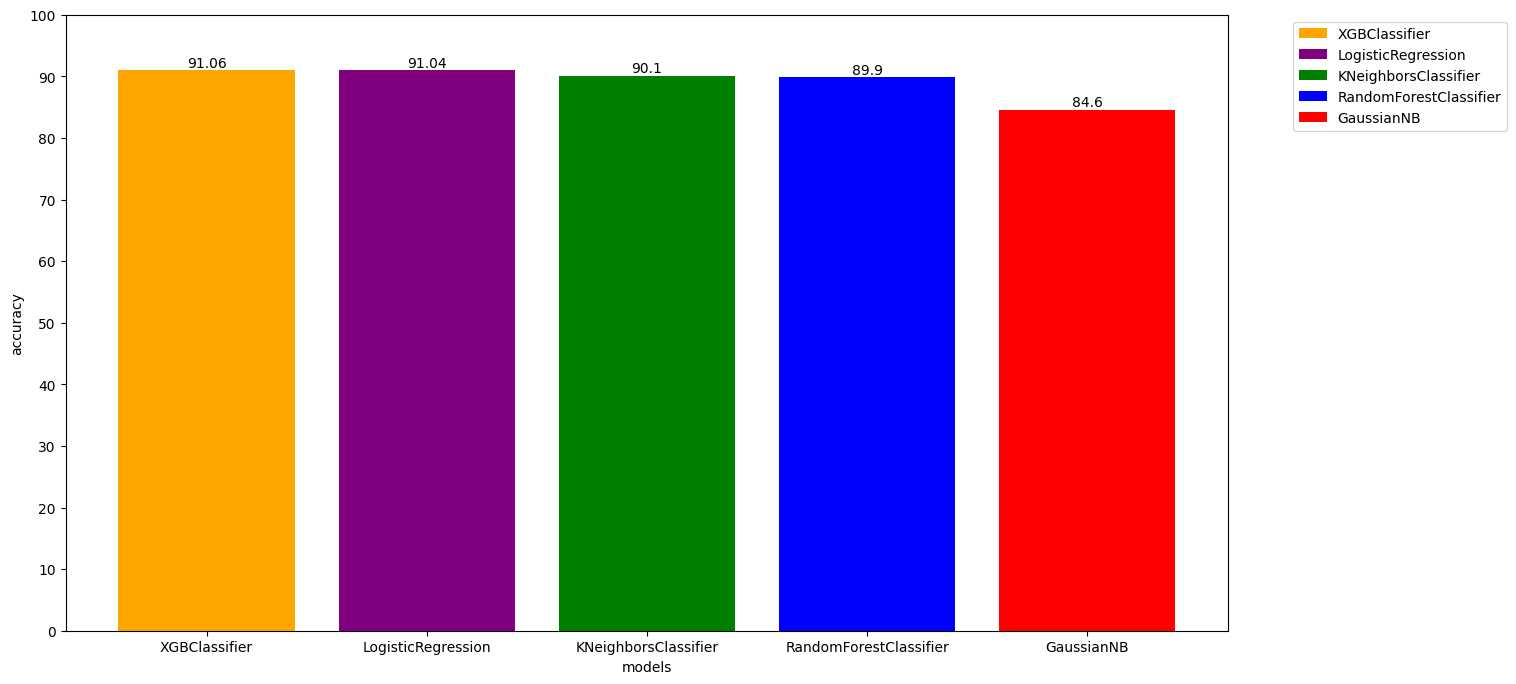

In [47]:
import matplotlib.pyplot as plt

# Define the models and their accuracies
models = ['GaussianNB', 'RandomForestClassifier', 'KNeighborsClassifier', 'XGBClassifier','LogisticRegression']
accuracy = [84.6, 89.9, 90.1, 91.06,91.04]
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Sort the models based on their accuracy
model_accuracy = list(zip(models, accuracy))
model_accuracy_sorted = sorted(model_accuracy, key=lambda x: x[1], reverse=True)
models_sorted = [ma[0] for ma in model_accuracy_sorted]
accuracy_sorted = [ma[1] for ma in model_accuracy_sorted]
colors_sorted = [colors[models.index(model)] for model in models_sorted]

fig, ax = plt.subplots(figsize=(15, 8))  # set the size of the figure
bar_plot = ax.bar(models_sorted, accuracy_sorted, color=colors_sorted)

# adjust the step size on the y-axis
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

# label the x and y axis
ax.set_xlabel('models')
ax.set_ylabel('accuracy')

# add the accuracy values as text annotations above each bar
for bar in bar_plot:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, height, ha='center', va='bottom')

# Add the legend
ax.legend(bar_plot, models_sorted, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


**PERFORMANCE EVALUATION**

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions for each model
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_nb = model_nb.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for each model
acc1 = accuracy_score(y_test, y_pred1) * 100
prec1 = precision_score(y_test, y_pred1) * 100
rec1 = recall_score(y_test, y_pred1) * 100
f1_1 = f1_score(y_test, y_pred1) * 100

acc2 = accuracy_score(y_test, y_pred2) * 100
prec2 = precision_score(y_test, y_pred2) * 100
rec2 = recall_score(y_test, y_pred2) * 100
f1_2 = f1_score(y_test, y_pred2) * 100

acc4 = accuracy_score(y_test, y_pred4) * 100
prec4 = precision_score(y_test, y_pred4) * 100
rec4 = recall_score(y_test, y_pred4) * 100
f1_4 = f1_score(y_test, y_pred4) * 100

acc_rf = accuracy_score(y_test, y_pred_rf) * 100
prec_rf = precision_score(y_test, y_pred_rf) * 100
rec_rf = recall_score(y_test, y_pred_rf) * 100
f1_rf = f1_score(y_test, y_pred_rf) * 100

acc_nb = accuracy_score(y_test, y_pred_nb) * 100
prec_nb = precision_score(y_test, y_pred_nb) * 100
rec_nb = recall_score(y_test, y_pred_nb) * 100
f1_nb = f1_score(y_test, y_pred_nb) * 100

# Print the results
print("Logistic Regression:")
print("Accuracy:", acc1, "%")
print("Precision:", prec1, "%")
print("Recall:", rec1, "%")
print("F1 Score:", f1_1, "%\n")

print("XGBoost:")
print("Accuracy:", acc2, "%")
print("Precision:", prec2, "%")
print("Recall:", rec2, "%")
print("F1 Score:", f1_2, "%\n")

print("K-Nearest Neighbors:")
print("Accuracy:", acc4, "%")
print("Precision:", prec4, "%")
print("Recall:", rec4, "%")
print("F1 Score:", f1_4, "%\n")

print("Random Forest:")
print("Accuracy:", acc_rf, "%")
print("Precision:", prec_rf, "%")
print("Recall:", rec_rf, "%")
print("F1 Score:", f1_rf, "%\n")

print("Naive Bayes:")
print("Accuracy:", acc_nb, "%")
print("Precision:", prec_nb, "%")
print("Recall:", rec_nb, "%")
print("F1 Score:", f1_nb, "%\n")


Logistic Regression:
Accuracy: 91.12532590923152 %
Precision: 54.55116133082235 %
Recall: 10.62606994375153 %
F1 Score: 17.787329853648554 %

XGBoost:
Accuracy: 91.0479915153122 %
Precision: 52.538930264048744 %
Recall: 9.488872584984104 %
F1 Score: 16.074572760227863 %

K-Nearest Neighbors:
Accuracy: 90.14317910645632 %
Precision: 38.287153652392945 %
Recall: 14.869161164098802 %
F1 Score: 21.419763959837944 %

Random Forest:
Accuracy: 89.84157497017102 %
Precision: 33.245469522240526 %
Recall: 12.337979946197114 %
F1 Score: 17.996967805226078 %

Naive Bayes:
Accuracy: 84.2414600733572 %
Precision: 27.525849335302805 %
Recall: 45.57348985081927 %
F1 Score: 34.321760751450405 %



In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions for each model
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_nb = model_nb.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score for each model
acc1 = accuracy_score(y_test, y_pred1)
prec1 = precision_score(y_test, y_pred1)
rec1 = recall_score(y_test, y_pred1)
f1_1 = f1_score(y_test, y_pred1)

acc2 = accuracy_score(y_test, y_pred2)
prec2 = precision_score(y_test, y_pred2)
rec2 = recall_score(y_test, y_pred2)
f1_2 = f1_score(y_test, y_pred2)

acc4 = accuracy_score(y_test, y_pred4)
prec4 = precision_score(y_test, y_pred4)
rec4 = recall_score(y_test, y_pred4)
f1_4 = f1_score(y_test, y_pred4)

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# Print the results
print("Logistic Regression:")
print("Accuracy:", acc1)
print("Precision:", prec1)
print("Recall:", rec1)
print("F1 Score:", f1_1, "\n")

print("XGBoost:")
print("Accuracy:", acc2)
print("Precision:", prec2)
print("Recall:", rec2)
print("F1 Score:", f1_2, "\n")

print("K-Nearest Neighbors:")
print("Accuracy:", acc4)
print("Precision:", prec4)
print("Recall:", rec4)
print("F1 Score:", f1_4, "\n")

print("Random Forest:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1 Score:", f1_rf, "\n")

print("Naive Bayes:")
print("Accuracy:", acc_nb)
print("Precision:", prec_nb)
print("Recall:", rec_nb)
print("F1 Score:", f1_nb, "\n")

Logistic Regression:
Accuracy: 0.9112532590923151
Precision: 0.5455116133082235
Recall: 0.10626069943751529
F1 Score: 0.17787329853648554 

XGBoost:
Accuracy: 0.9104799151531221
Precision: 0.5253893026404874
Recall: 0.09488872584984104
F1 Score: 0.16074572760227862 

K-Nearest Neighbors:
Accuracy: 0.9014317910645632
Precision: 0.38287153652392947
Recall: 0.14869161164098801
F1 Score: 0.21419763959837945 

Random Forest:
Accuracy: 0.8984157497017102
Precision: 0.3324546952224053
Recall: 0.12337979946197114
F1 Score: 0.17996967805226077 

Naive Bayes:
Accuracy: 0.842414600733572
Precision: 0.27525849335302804
Recall: 0.4557348985081927
F1 Score: 0.34321760751450403 



In [50]:
pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
from sklearn.metrics import roc_curve


In [52]:
#from sklearn.metrics import plot_roc_curve

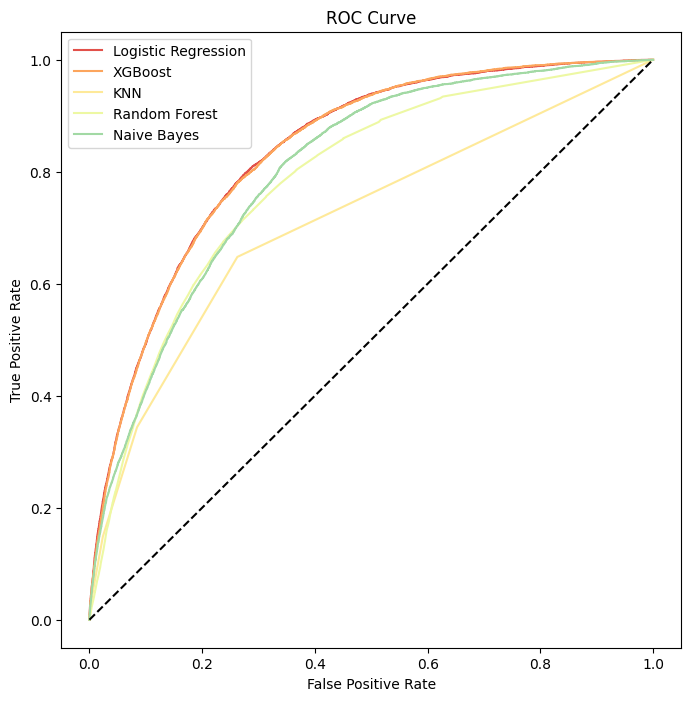

In [53]:
# Get the predicted probabilities for each model
y_pred_proba1 = model1.predict_proba(X_test)[:,1]
y_pred_proba2 = model2.predict_proba(X_test)[:,1]
y_pred_proba4 = model4.predict_proba(X_test)[:,1]
y_pred_proba_rf = model_rf.predict_proba(X_test)[:,1]
y_pred_proba_nb = model_nb.predict_proba(X_test)[:,1]

# Calculate the false positive rate and true positive rate for each model
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_proba1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_proba2)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_pred_proba4)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_proba_nb)

# Plot the ROC curve for each model
plt.figure(figsize=(8,8))
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='XGBoost')
plt.plot(fpr4, tpr4, label='KNN')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


The Area Under the ROC Curve (AUC) is a commonly used metric to evaluate the performance of a classification model. It measures the ability of the model to distinguish between positive and negative examples across all possible classification thresholds. In simpler terms, AUC represents the probability that the model will correctly rank a randomly chosen positive example higher than a randomly chosen negative example. A higher AUC indicates better performance of the model in classifying positive and negative examples.





In [54]:
from sklearn.metrics import roc_auc_score

# Calculate AUC for each model
auc1 = roc_auc_score(y_test, model1.predict_proba(X_test)[:, 1])
auc2 = roc_auc_score(y_test, model2.predict_proba(X_test)[:, 1])
auc4 = roc_auc_score(y_test, model4.predict_proba(X_test)[:, 1])
auc_rf = roc_auc_score(y_test, model_rf.predict_proba(X_test)[:, 1])
auc_nb = roc_auc_score(y_test, model_nb.predict_proba(X_test)[:, 1])

# Print the results
print("Logistic Regression AUC:", auc1)
print("XGBoost AUC:", auc2)
print("K-Nearest Neighbors AUC:", auc4)
print("Random Forest AUC:", auc_rf)
print("Naive Bayes AUC:", auc_nb)


Logistic Regression AUC: 0.8356969317240452
XGBoost AUC: 0.8350534157824043
K-Nearest Neighbors AUC: 0.7128111063903091
Random Forest AUC: 0.7851132651797322
Naive Bayes AUC: 0.8023240464519074


In [57]:
pip install pygal


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 6.6 MB/s eta 0:00:00


In [59]:
import pygal

# Sample data: accuracy and precision scores for five models
model_names = ['Logistic Regression', 'XGBoost', 'KNN', 'Random Forest', 'Naive Bayes']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
model_scores = [[0.9113, 0.5455, 0.1063, 0.1779],
                [0.9113, 0.5455, 0.0949, 0.1607],
                [0.9014, 0.3829, 0.1487, 0.2142],
                [0.8984, 0.3325, 0.1234, 0.1800],
                [0.8424, 0.2753, 0.4557, 0.3432]]

# Create a radar chart object
radar_chart = pygal.Radar()

# Set the chart title and labels for the axes
radar_chart.title = 'Model Performance'
radar_chart.x_labels = metrics

# Add the data to the chart
for i, model_name in enumerate(model_names):
    radar_chart.add(model_name, model_scores[i])

# Render the chart
radar_chart.render_to_file('model_performance.svg')
radar_chart.render_in_browser()

file:///tmp/tmpo7troe66.html


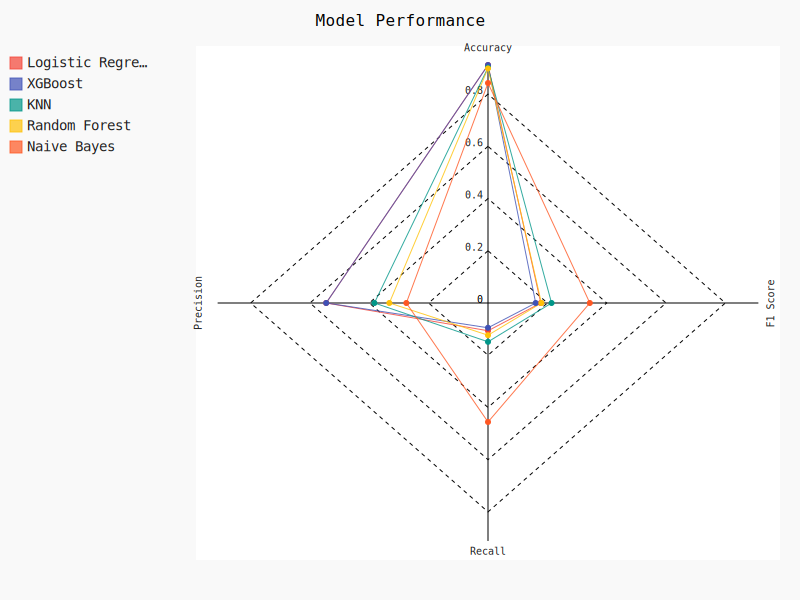

In [60]:
from IPython.display import SVG, display
display(SVG(radar_chart.render(disable_xml_declaration=True)))
